# Медианный фильтр

In [1]:
import cv2
import numpy as np

In [4]:
img = cv2.imread('/content/pic.png')

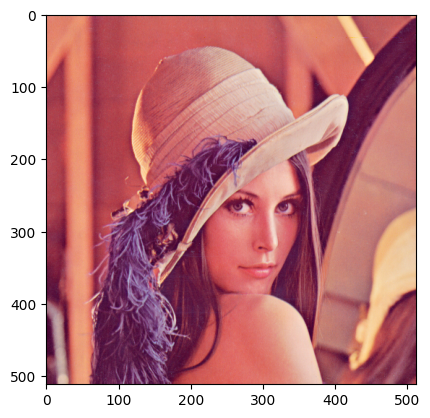

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [6]:
img.shape

(512, 512, 3)

In [21]:
def median_filter(img, ksize):
    result = np.zeros_like(img)
    pad = ksize // 2
    padded = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode="median")
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                window = padded[row:row+ksize, col:col+ksize, channel]
                result[row, col, channel] = np.median(window)
                # TODO: определяем текущее положение окна в координатах изображения
                # TODO: вычислить медиану в окрестности х, y для окна размера ksize
    return result

## Добавляем случайный шум на изображение

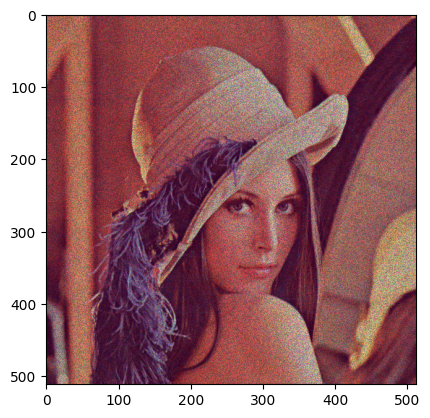

In [22]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [23]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 2));

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1, step=2), Output()), _dom_classes=…